In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the stock data into a pandas dataframe
df = pd.read_csv('TSLA.csv')

In [3]:
# Define a function to identify the three white soldiers pattern
def is_three_white_soldiers(row):
    # Check that the pattern exists
    if len(df) < 3 or row.name < 2:
        return False
    # Check that the pattern is a three white soldiers
    prev_close_1 = df.loc[row.name - 2, 'Close']
    prev_open_1 = df.loc[row.name - 2, 'Open']
    prev_close_2 = df.loc[row.name - 1, 'Close']
    prev_open_2 = df.loc[row.name - 1, 'Open']
    curr_close = row['Close']
    curr_open = row['Open']
    if (curr_close > curr_open) and (prev_close_1 > prev_open_1) and (prev_close_2 > prev_open_2):
        return True
    else:
        return False

# Identify the three white soldiers patterns in the data
three_white_soldiers_mask = df.apply(is_three_white_soldiers, axis=1)
three_white_soldiers_dates = df[three_white_soldiers_mask]['Date']

In [4]:
# Print out the dates of the patterns
print('Dates of Three White Soldiers patterns:')
for date in three_white_soldiers_dates:
    print(date)

Dates of Three White Soldiers patterns:
2022-05-04
2022-05-27
2022-06-22
2022-07-06
2022-07-07
2022-07-08
2022-07-15
2022-07-21
2022-07-29
2022-09-08
2022-09-09
2022-09-12
2022-09-16
2022-09-19
2022-09-20
2022-10-25
2022-10-26
2022-12-30
2023-01-13
2023-01-17
2023-01-24
2023-01-25
2023-01-26
2023-01-27
2023-02-02
2023-02-03
2023-02-06
2023-02-07
2023-02-08
2023-02-15
2023-04-11
2023-04-17


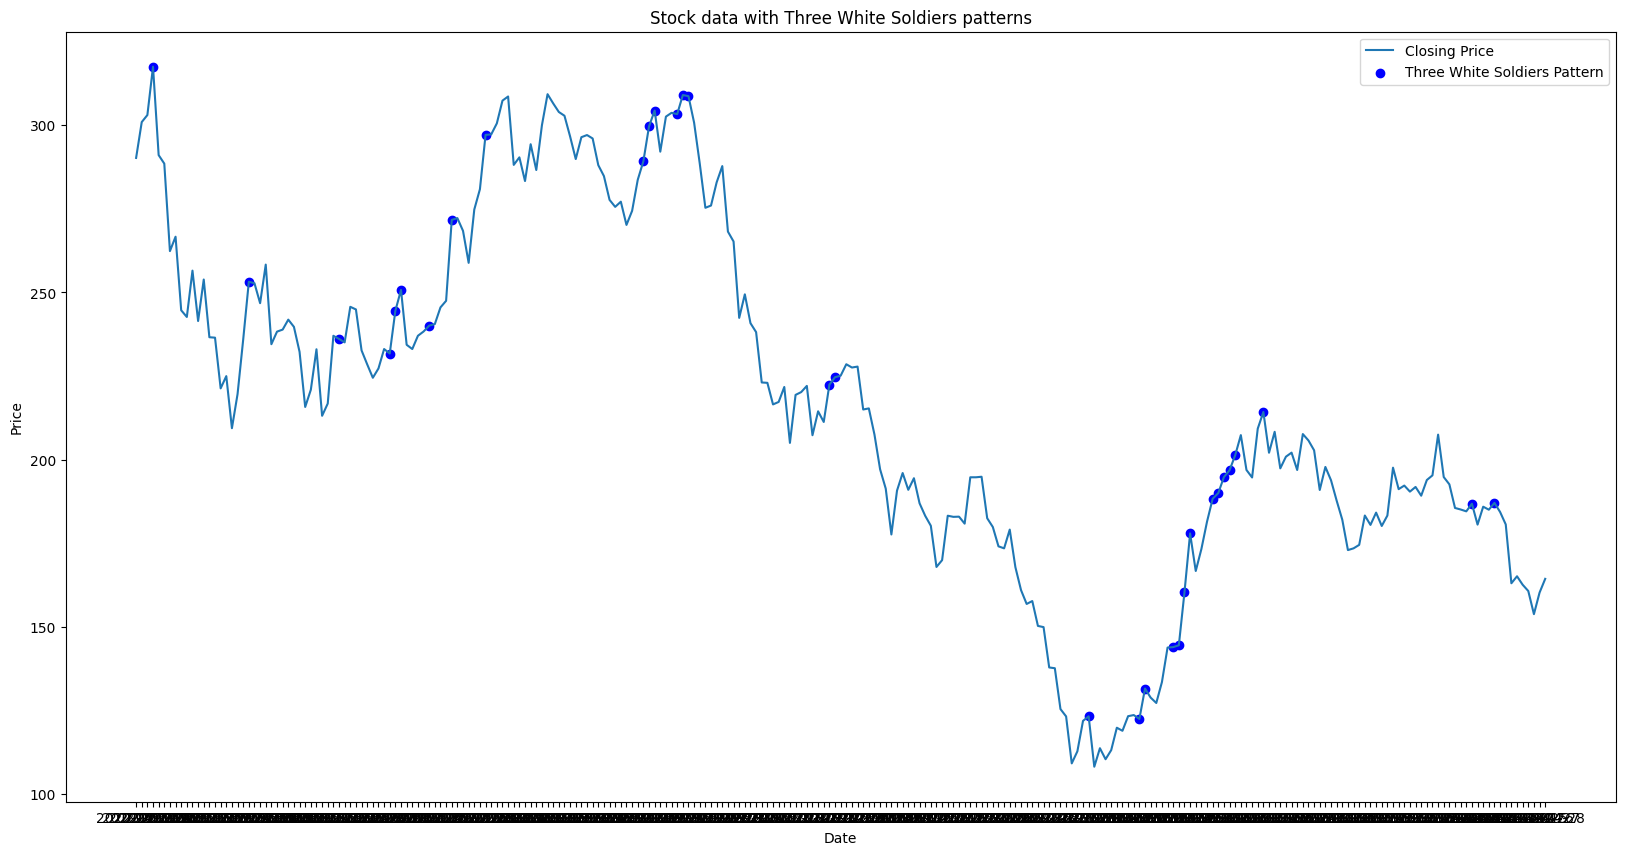

In [5]:
# Plot the stock data with the patterns highlighted
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(df['Date'], df['Close'], label='Closing Price')
ax.scatter(three_white_soldiers_dates, df[three_white_soldiers_mask]['Close'], color='b', label='Three White Soldiers Pattern')
ax.set_title('Stock data with Three White Soldiers patterns')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.show()